# Summary of Changes
The following key changes were made to this python notebook for the sake of convenience in running the notebook.

    1. Added new problem formulation function which moves the individual actor problem formulations to a separate python (see 'get_model_for_actor_problem_formulation' in 'problem_formulation_V2_0.py') file for additional notes.
        - The 'problem_formulation_actor' function is now removed from this notebook as a result
    2. Added 'DikeNetworkTS' class for time series outcomes in the 'dike_model_function_V2_0.py' file.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, TimeSeriesOutcome, IntegerParameter, RealParameter)

from dike_model_function_V2_0 import (DikeNetwork,DikeNetworkTS)  # @UnresolvedImport
from problem_formulation_V2_1 import get_model_for_actor_problem_formulation

D:\Anaconda\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
# Problem formulations:
#    get_model_for_actor_problem_formulation(problem_formulation_id, outcome_type='time_series')
#    problem_formulation_id options
#        1 - RWS (GOOD)
#        2 - Environmental interest group
#        3 - Transport company 
#        4 - Delta commission
#        5 - Gelderland (GOOD)
#        6 - Overijssel (GOOD)s
#        7 - Dike rings 1 and 2
#        8 - Dike ring 3
#        9 - Dike ring 4
#        10 - Dike ring 5
#        11 - RWS formulation 2
#
#    outcome_type options
#        'time_series' (default)
#        'scalar'


model, planning_steps = get_model_for_actor_problem_formulation(1,outcome_type='scalar')

In [3]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)

if __name__ == '__main__':
    num_scenarios = 420
    num_policies = 69
    with MultiprocessingEvaluator(model) as evaluator:
        experiments, outcomes = evaluator.perform_experiments(scenarios=num_scenarios, policies=num_policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 420 scenarios * 69 policies * 1 model(s) = 28980 experiments
[MainProcess/INFO] 2898 cases completed
[MainProcess/INFO] 5796 cases completed
[MainProcess/INFO] 8694 cases completed
[MainProcess/INFO] 11592 cases completed
[MainProcess/INFO] 14490 cases completed
[MainProcess/INFO] 17388 cases completed
[MainProcess/INFO] 20286 cases completed
[MainProcess/INFO] 23184 cases completed
[MainProcess/INFO] 26082 cases completed
[MainProcess/INFO] 28980 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
from ema_workbench.util.utilities import save_results
results = experiments, outcomes
save_results(results, 'results-420s-69p.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\epron\Dropbox\EPA1361\sassy_lion\ErikWorkingFolder\results-420s-69p.tar.gz


In [58]:
analysis_gelderland_names = ['Expected Annual Damage Gelderland',
                             'Dike Investment Costs Gelderland',
                             'Expected Number of Deaths in Gelderland',
                             'RfR Total Costs',
                             'Expected Total Evacuation Costs']
analysis_overijssel_names = ['Expected Annual Damage Overijssel',
                             'Dike Investment Costs Overijssel',
                             'Expected Number of Deaths in Overijssel',
                             'RfR Total Costs',
                             'Expected Total Evacuation Costs']

analysis_gelderland = {key:outcomes[key] for key in analysis_gelderland_names}
analysis_overijssel = {key:outcomes[key] for key in analysis_overijssel_names}

analysis_gelderland

{'Expected Annual Damage Gelderland': array([      0.        ,       0.        , 2294376.4580688 , ...,
        6188063.68033204,       0.        , 7547708.41502502]),
 'Dike Investment Costs Gelderland': array([4.12041770e+08, 4.12041770e+08, 4.12041770e+08, ...,
        3.12711482e+08, 3.12711482e+08, 3.12711482e+08]),
 'Expected Number of Deaths in Gelderland': array([0.        , 0.        , 0.00093917, ..., 0.01556462, 0.        ,
        0.01556462]),
 'RfR Total Costs': array([1.0860e+09, 1.0860e+09, 1.0860e+09, ..., 1.2417e+09, 1.2417e+09,
        1.2417e+09]),
 'Expected Total Evacuation Costs': array([ 0.        ,  0.        , 96.69032885, ...,  0.        ,
         0.        ,  0.        ])}

[MainProcess/INFO] no time dimension found in results


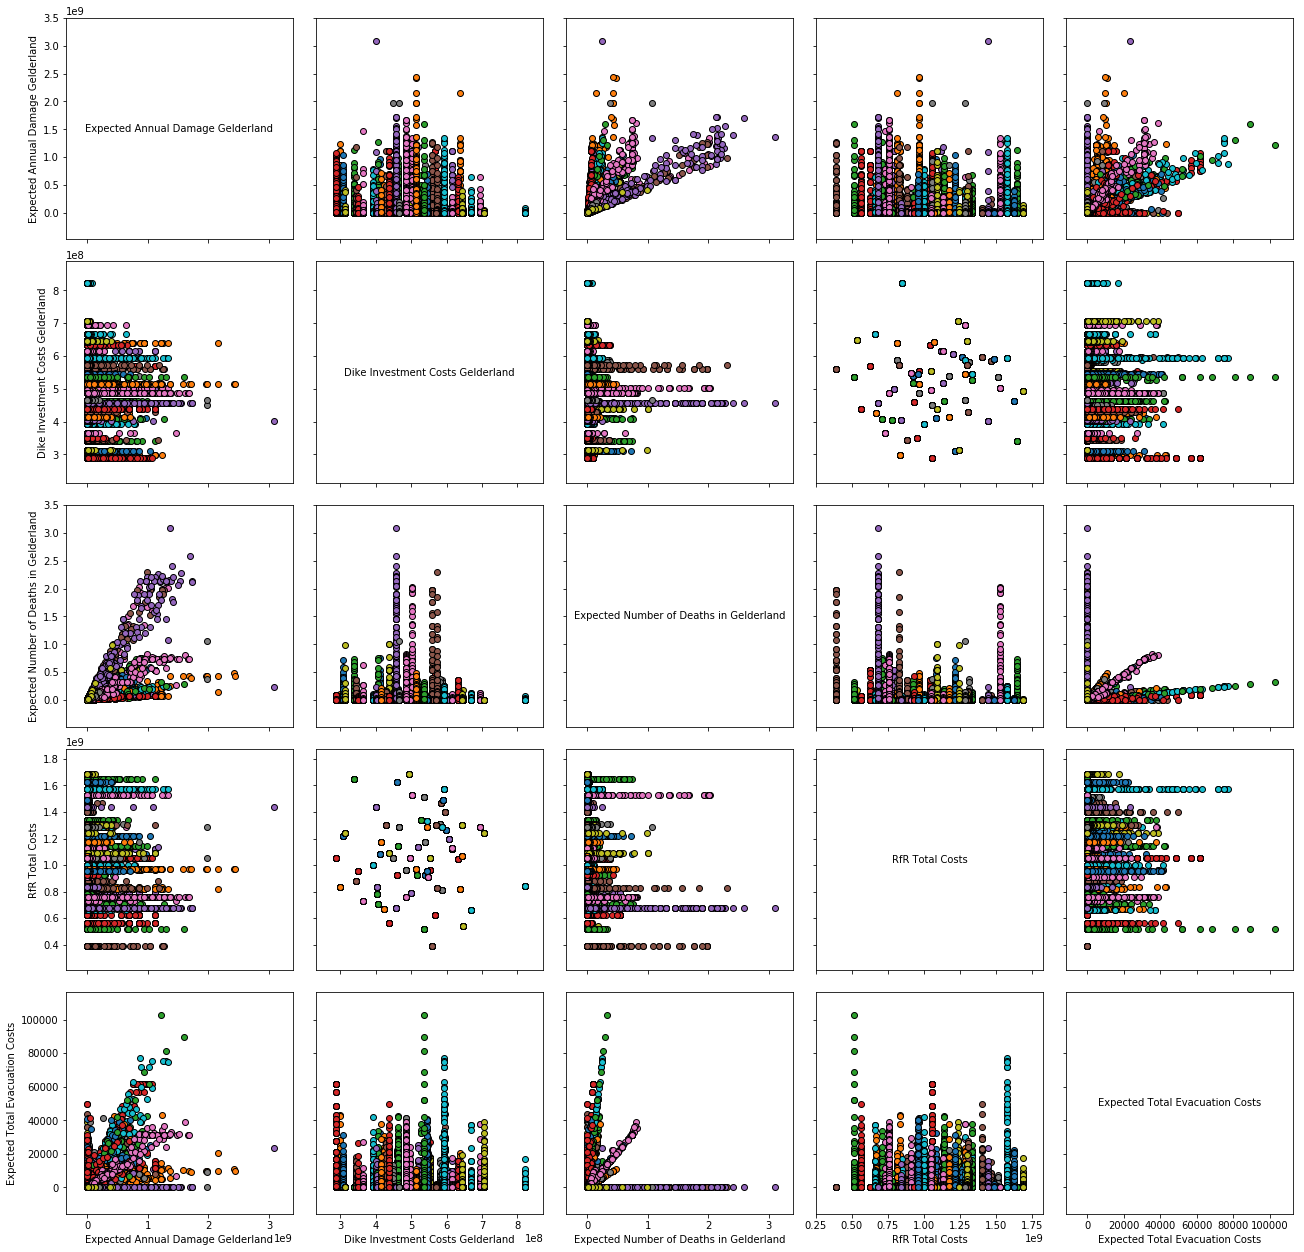

<Figure size 432x288 with 0 Axes>

In [59]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, analysis_gelderland, group_by='policy',
                                        legend=False)
fig.set_size_inches(22,22)
plt.show()
plt.savefig('gelderland_pairs_scatter.png')

[MainProcess/INFO] no time dimension found in results


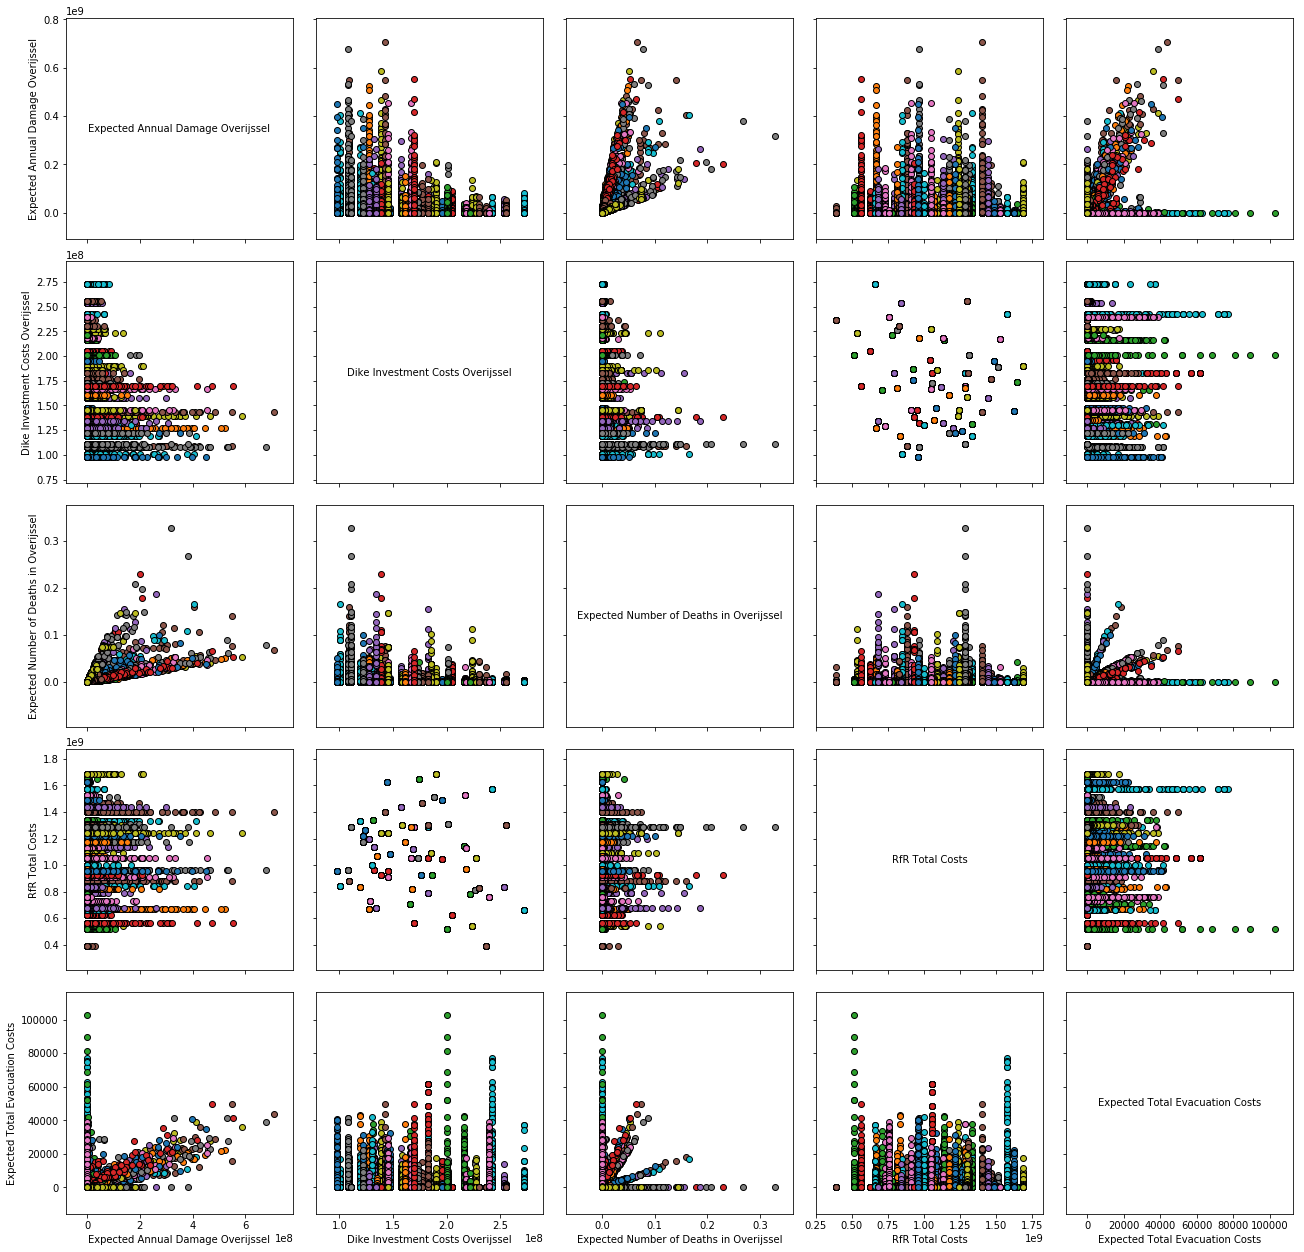

<Figure size 432x288 with 0 Axes>

In [60]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, analysis_overijssel, group_by='policy',
                                        legend=False)
fig.set_size_inches(22,22)
plt.show()
plt.savefig('overijssel_pairs_scatter.png')

In [57]:
I = outcomes['Expected Total Evacuation Costs']
maxI = np.max(I, axis=1)

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.1_pfail'].values, experiments['discount rate 0'].values, c=maxI)
plt.colorbar(sc)
ax.set_xlabel('Discount rate')
ax.set_ylabel('A.3_pfail')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1